In [1]:
# Push, pull, and edit test: Alihan Ince

In [4]:
import pandas as pd
import numpy as np
from keras import Sequential
from keras.layers import SimpleRNN, Dense, LSTM
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv(r'/Users/LaurensKrook/Documents/Universiteit van Amsterdam; Kunstmatige Intelligentie/Jaar 2/Semester 1/Leren en Beslissen/General/Data/Houses/Houses58-75/House64-1m.csv')
df.set_index('timestamp', inplace = True)
df.index= pd.to_datetime(df.index)
df = df.resample('5T').mean()
df = df.loc['2020-04-01 04:00:00+02:00':'2020-04-09 03:59:00+02:00'] 
df
# df['timestamp'] = pd.to_datetime(df.timestamp, format='%Y-%m-%d %H:%M:%S')
# df['Date'] = df['timestamp'].dt.date
# df["Date"] = df['Date'].astype(str)
# df = df.set_index('Date')
# df = df.loc['2019-04-01':'2019-04-08']
# df

,EXPORT_KW,IMPORT_KW,PV_KW,TOTAL_KW,UNC_KW
timestamp,,,,,
2020-04-01 04:00:00+02:00,0.0,0.264,0.000,0.264,0.264
2020-04-01 04:05:00+02:00,0.0,0.276,0.000,0.276,0.276
2020-04-01 04:10:00+02:00,0.0,0.252,0.000,0.252,0.252
2020-04-01 04:15:00+02:00,0.0,0.264,0.000,0.264,0.264
2020-04-01 04:20:00+02:00,0.0,0.180,0.000,0.180,0.180
...,...,...,...,...,...
2020-04-09 03:35:00+02:00,0.0,0.240,-0.012,0.240,0.252
2020-04-09 03:40:00+02:00,0.0,0.336,0.000,0.336,0.336
2020-04-09 03:45:00+02:00,0.0,0.408,0.000,0.408,0.408


In [7]:
# import_kw = df['IMPORT_KW']
# train_test_balance = len(df)//(8)
# train = list(import_kw)[train_test_balance:]
# test = list(import_kw)[:train_test_balance]

In [8]:
# import_kw = df['IMPORT_KW']
# train_test_balance = int(len(import_kw) * 0.832)
# train = list(import_kw)[:train_test_balance]
# test = list(import_kw)[train_test_balance:]

In [9]:
import_kw = df['IMPORT_KW']
len_test = len(import_kw)-(288)
train = list(import_kw)[:len_test]
test = list(import_kw)[(len_test-100):]

In [10]:
print(len(train))
print(len(test))

2016
388


Training

In [11]:
windowSize, X_train, y_train = 100, [], []
for index in range(len(train)-windowSize):
    X_train.append(train[index:index+windowSize])
    y_train.append(train[index+windowSize])

In [12]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = X_train.reshape((len(X_train), 100,1))

Model

In [13]:
model = Sequential()
model.add(SimpleRNN(64, input_shape=(100,1), return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(16))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='Adam', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
60/60 [==============================] - 5s 44ms/step - loss: 0.1699 - mae: 0.2296
Epoch 2/5
60/60 [==============================] - 3s 46ms/step - loss: 0.0803 - mae: 0.1358
Epoch 3/5
60/60 [==============================] - 3s 43ms/step - loss: 0.0756 - mae: 0.1362
Epoch 4/5
60/60 [==============================] - 3s 43ms/step - loss: 0.0702 - mae: 0.1239
Epoch 5/5
60/60 [==============================] - 3s 42ms/step - loss: 0.0708 - mae: 0.1304


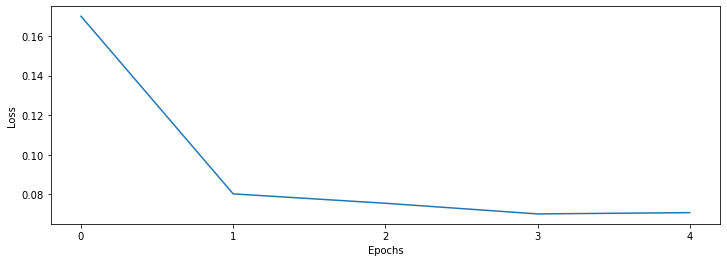

In [14]:
losses = model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses)),losses)

In [15]:
y_pred_model = model.predict(X_train)

In [16]:
rmse_train = sqrt(mean_squared_error(y_train, y_pred_model))
print(rmse_train)

0.2609050044995401


Test

In [17]:
windowSize, X_test, y_test = 100, [], []
for index in range(len(test)-windowSize):
    X_test.append(test[index:index+windowSize])
    y_test.append(test[index+windowSize])

In [18]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = X_test.reshape((len(X_test), 100,1))

In [19]:
y_test_pred_model = model.predict(X_test)

In [20]:
rmse_test = sqrt(mean_squared_error(y_test, y_test_pred_model))
print(rmse_test)

0.18996315945061656


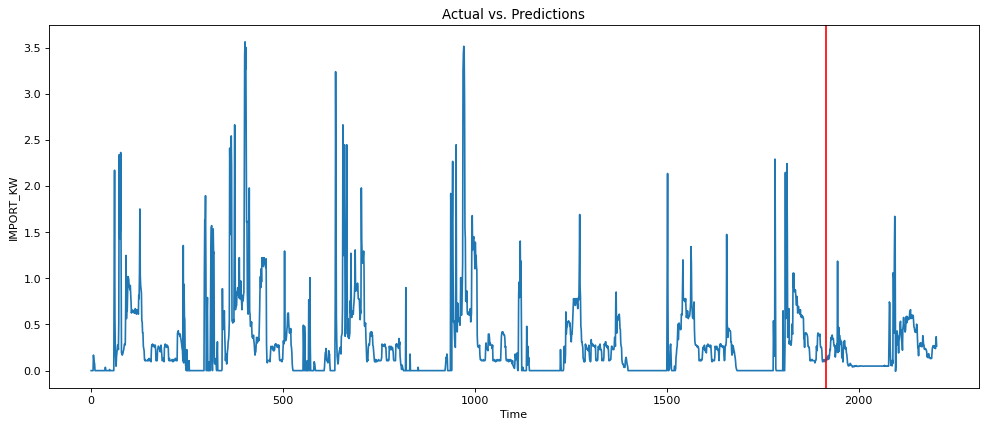

In [21]:
def plot_result(y_train, y_test, y_pred_model, y_test_pred_model):
    result = np.append(y_train, y_test_pred_model)
#     predictions = np.append(y_pred_model, y_test_pred_model)
    rows = len(result)
    plt.figure(figsize=(15,6), dpi=80)
    plt.plot(range(rows), result)
#     plt.plot(range(rows), y_test_pred_model)
    plt.axvline(x=len(y_train), color='r')
#     plt.legend(['Actual', 'Prediction'])
    plt.xlabel('Time')
    plt.ylabel('IMPORT_KW')
    plt.title('Actual vs. Predictions')

plot_result(y_train, y_test, y_pred_model, y_test_pred_model)

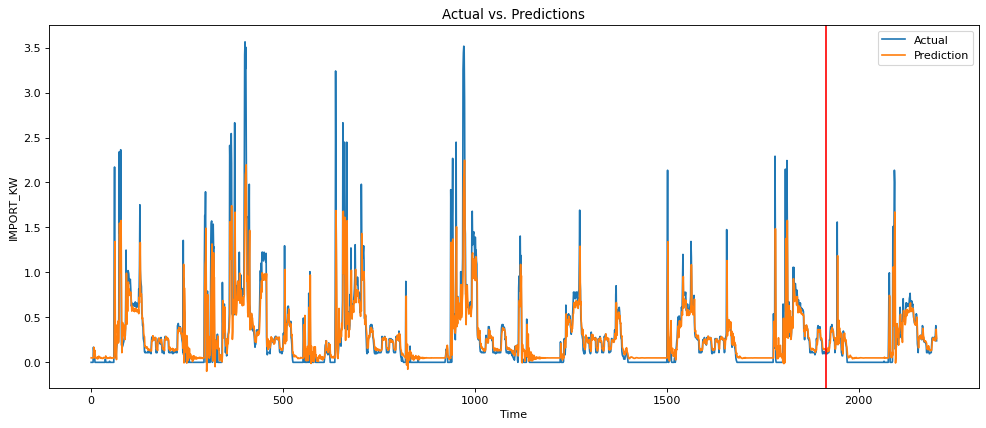

In [22]:
def plot_result(y_train, y_test, y_pred_model, y_test_pred_model):
    actual = np.append(y_train, y_test)
    predictions = np.append(y_pred_model, y_test_pred_model)
    rows = len(actual)
    plt.figure(figsize=(15,6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(y_train), color='r')
    plt.legend(['Actual', 'Prediction'])
    plt.xlabel('Time')
    plt.ylabel('IMPORT_KW')
    plt.title('Actual vs. Predictions')

plot_result(y_train, y_test, y_pred_model, y_test_pred_model)

In [23]:
print(rmse_train)
print(rmse_test)

0.2609050044995401
0.18996315945061656


**Data to CSV**

In [24]:
test = import_kw[len_test:]
training = import_kw[:len_test]

#dfc = dfc.loc['2020-04-08 04:00:00+02:00':'2020-04-09 03:59:00+02:00'] 
print(training, test)

timestamp
2020-04-01 04:00:00+02:00    0.264
2020-04-01 04:05:00+02:00    0.276
2020-04-01 04:10:00+02:00    0.252
2020-04-01 04:15:00+02:00    0.264
2020-04-01 04:20:00+02:00    0.180
                             ...  
2020-04-08 03:35:00+02:00    0.108
2020-04-08 03:40:00+02:00    0.096
2020-04-08 03:45:00+02:00    0.108
2020-04-08 03:50:00+02:00    0.108
2020-04-08 03:55:00+02:00    0.108
Freq: 5T, Name: IMPORT_KW, Length: 2016, dtype: float64 timestamp
2020-04-08 04:00:00+02:00    0.096
2020-04-08 04:05:00+02:00    0.120
2020-04-08 04:10:00+02:00    0.096
2020-04-08 04:15:00+02:00    0.108
2020-04-08 04:20:00+02:00    0.144
                             ...  
2020-04-09 03:35:00+02:00    0.240
2020-04-09 03:40:00+02:00    0.336
2020-04-09 03:45:00+02:00    0.408
2020-04-09 03:50:00+02:00    0.300
2020-04-09 03:55:00+02:00    0.240
Freq: 5T, Name: IMPORT_KW, Length: 288, dtype: float64


In [25]:
data = y_test_pred_model
#data = data[288:]
df_prediction = pd.DataFrame(data, columns = ['RNN_prediction_IMPORT_KW'])
df_prediction['timestamp'] = pd.date_range(start=test.index[0], periods=len(df_prediction), freq='5T')
df_prediction.set_index('timestamp', inplace = True)
df_prediction.index= pd.to_datetime(df_prediction.index)
df_prediction

,RNN_prediction_IMPORT_KW
timestamp,
2020-04-08 04:00:00+02:00,0.136913
2020-04-08 04:05:00+02:00,0.128902
2020-04-08 04:10:00+02:00,0.142578
2020-04-08 04:15:00+02:00,0.117977
2020-04-08 04:20:00+02:00,0.129139
...,...
2020-04-09 03:35:00+02:00,0.269147
2020-04-09 03:40:00+02:00,0.238504
2020-04-09 03:45:00+02:00,0.315521


<AxesSubplot:xlabel='timestamp'>

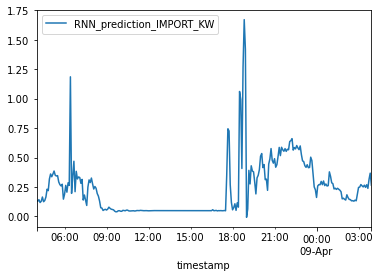

In [26]:
df_prediction.plot()

In [27]:
df_prediction.to_csv('IMPORT_KW_predictions.csv')

In [28]:
Import_prediction_24hours = pd.read_csv(r'IMPORT_KW_predictions.csv')
Import_prediction_24hours

,timestamp,RNN_prediction_IMPORT_KW
0,2020-04-08 04:00:00+02:00,0.136913
1,2020-04-08 04:05:00+02:00,0.128902
2,2020-04-08 04:10:00+02:00,0.142578
3,2020-04-08 04:15:00+02:00,0.117977
4,2020-04-08 04:20:00+02:00,0.129139
...,...,...
283,2020-04-09 03:35:00+02:00,0.269147
284,2020-04-09 03:40:00+02:00,0.238504
285,2020-04-09 03:45:00+02:00,0.315521
286,2020-04-09 03:50:00+02:00,0.367632
